<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-477 Redes Neuronales Artificiales I-2018 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<H3 align='center'>  Jorge Portilla / John Rodriguez </H3>

<hr style="height:2px;border:none"/>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
%matplotlib inline

## Pregunta 1

**a) Construya un dataframe con los datos a analizar y descríbalo brevemete. Además, realice la división de éste en los conjuntos de entrenamiento, validación y testeo correspondientes. Comente por qué se deben eliminar ciertas columnas**

In [11]:
df = pd.read_csv("EnergyMolecule/roboBohr.csv")
df.drop(columns=['Unnamed: 0','pubchem_id'],axis=1,inplace=True)
total = len(df)

print(df.shape)
print(df.info())

dfTrain = df[:int(0.6*total)]
dfVal = df[int(0.6*total):int(0.85*total)]    
dfTest = df[int(0.85*total)::]

(16242, 1276)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16242 entries, 0 to 16241
Columns: 1276 entries, 0 to Eat
dtypes: float64(1276)
memory usage: 158.1 MB
None


Los datos corresponden a un csv compuesto de 1276 columnas correspondientes a las variables, y 16242 filas que corresponden a las diferentes simulaciones.

Las columnas 'Unnamed: 0' y 'pubchem_id' se eliminan por no tener datos relevante para los conjuntos de entrenamiento, validación y testeo. 'Unnamed: 0' no es necesaria debido a que corresponde a una enumeración, y el dataframe de panda ya viene con una incluída. 'pubchem_id' no es necesaria tampoco pues corresponde a la ID de la simulación.

**a.1) Una buena práctica es la de normalizar los datos antes de trabajar con el modelo. Explique por qué se aconseja dicho preprocesamiento**

Para un mejor funcionamiento de los algoritmos de Machine learning, hay que normalizar las variables de entrada del algoritmo, Normalizar, hace referencia a extender o comprimir los valores de una variable para estar en un rango definido. Es decir, realiza una ponderación de las caracterisiticas de una mejor manera y ademas se reduce el facor de escala. Sin embargo, realizar una mala eleccion del metodo de normalización puede alterar los resultados del analisis de datos. En este caso, se realiza una estandarización de los datos, debido a que si usamos normalización los outlayers podrían causar un desbalance de los datos en el intervalo, haciendo que muchos de ellos se agrupen cerca del 0.0 y que el outlayer quede como -1 o 1.


In [14]:
#Pre-processing#

#x var's
xTrain = pd.DataFrame.copy(dfTrain)
xVal = pd.DataFrame.copy(dfVal)
xTest = pd.DataFrame.copy(dfTest)

#y var's
yTrain = xTrain.pop('Eat').values.reshape(-1, 1)
yVal = xVal.pop('Eat').values.reshape(-1, 1)
yTest = xTest.pop('Eat').values.reshape(-1, 1)

#Scaler
scaler = StandardScaler().fit(xTrain)

#All standarized
xTrainScaled = pd.DataFrame(scaler.transform(xTrain),columns=xTrain.columns)
xValScaled = pd.DataFrame(scaler.transform(xVal),columns=xVal.columns)
xTestScaled = pd.DataFrame(scaler.transform(xTest),columns=xTest.columns)

**b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.**

In [15]:
model = Sequential()
model.add(Dense(256, input_dim=xTrainScaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear"))
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(xTrainScaled.values, y_train, epochs=250, verbose=1, validation_data=(xValScaled.values, y_val))

Train on 9745 samples, validate on 4060 samples
Epoch 1/250
9745/9745 [==============================] - 1s - loss: 1.5492 - val_loss: 0.5937
Epoch 2/250
9745/9745 [==============================] - 0s - loss: 0.6062 - val_loss: 0.5388
Epoch 3/250
9745/9745 [==============================] - 0s - loss: 0.5162 - val_loss: 0.3826
Epoch 4/250
9745/9745 [==============================] - 0s - loss: 0.4467 - val_loss: 0.3978
Epoch 5/250
9745/9745 [==============================] - 0s - loss: 0.3832 - val_loss: 0.3109
Epoch 6/250
9745/9745 [==============================] - 0s - loss: 0.3384 - val_loss: 0.2901
Epoch 7/250
9745/9745 [==============================] - 0s - loss: 0.2929 - val_loss: 0.2592
Epoch 8/250
9745/9745 [==============================] - 1s - loss: 0.2643 - val_loss: 0.2909
Epoch 9/250
9745/9745 [==============================] - ETA: 0s - loss: 0.239 - 0s - loss: 0.2364 - val_loss: 0.2143
Epoch 10/250
9745/9745 [==============================] - 1s - loss: 0.2130 - val_

9745/9745 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0487
Epoch 87/250
9745/9745 [==============================] - 0s - loss: 0.0277 - val_loss: 0.0441
Epoch 88/250
9745/9745 [==============================] - 0s - loss: 0.0287 - val_loss: 0.0433
Epoch 89/250
9745/9745 [==============================] - 0s - loss: 0.0279 - val_loss: 0.0455
Epoch 90/250
9745/9745 [==============================] - 1s - loss: 0.0278 - val_loss: 0.0406
Epoch 91/250
9745/9745 [==============================] - 0s - loss: 0.0272 - val_loss: 0.0534
Epoch 92/250
9745/9745 [==============================] - 0s - loss: 0.0270 - val_loss: 0.0432
Epoch 93/250
9745/9745 [==============================] - 0s - loss: 0.0272 - val_loss: 0.0403
Epoch 94/250
9745/9745 [==============================] - 0s - loss: 0.0269 - val_loss: 0.0472
Epoch 95/250
9745/9745 [==============================] - 0s - loss: 0.0274 - val_loss: 0.0480
Epoch 96/250
9745/9745 [==============================] - 0s - 

9745/9745 [==============================] - 1s - loss: 0.0191 - val_loss: 0.0334
Epoch 172/250
9745/9745 [==============================] - 1s - loss: 0.0194 - val_loss: 0.0554
Epoch 173/250
9745/9745 [==============================] - 0s - loss: 0.0189 - val_loss: 0.0405
Epoch 174/250
9745/9745 [==============================] - 1s - loss: 0.0185 - val_loss: 0.0348
Epoch 175/250
9745/9745 [==============================] - 1s - loss: 0.0184 - val_loss: 0.0399
Epoch 176/250
9745/9745 [==============================] - 0s - loss: 0.0186 - val_loss: 0.0333
Epoch 177/250
9745/9745 [==============================] - 1s - loss: 0.0184 - val_loss: 0.0338
Epoch 178/250
9745/9745 [==============================] - 1s - loss: 0.0190 - val_loss: 0.0386
Epoch 179/250
9745/9745 [==============================] - 1s - loss: 0.0191 - val_loss: 0.0374
Epoch 180/250
9745/9745 [==============================] - 1s - loss: 0.0186 - val_loss: 0.0326
Epoch 181/250
9745/9745 [=============================

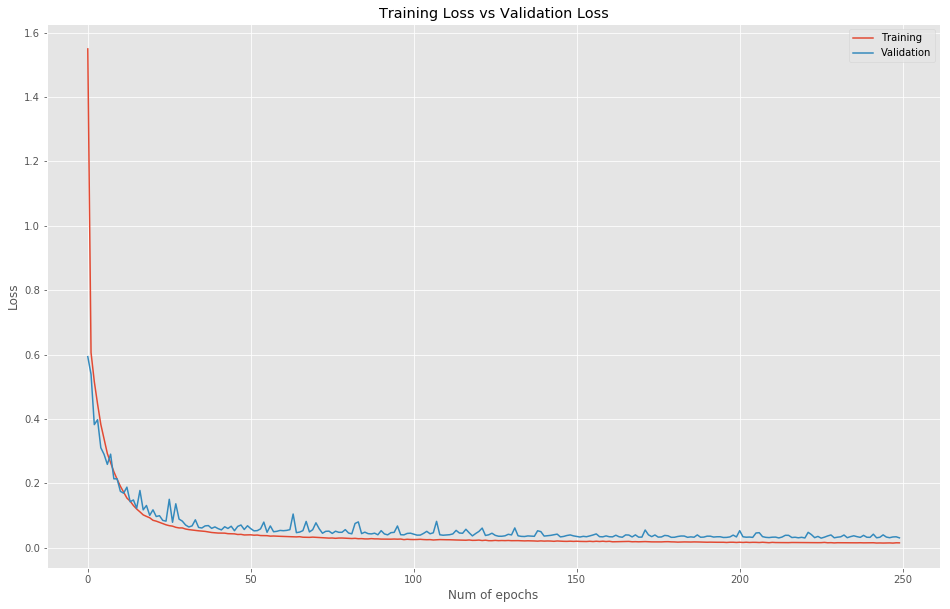

In [20]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xc = range(250)
plt.figure(1, figsize=(16, 10))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.ylabel('Loss')
plt.xlabel('Num of epochs')
plt.title('Training Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Training', 'Validation'])
#print(plt.style.available)
plt.style.use(['ggplot'])

>b) Muestre en un gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de *epochs* de entrenamiento, para una red *feedforward* de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrene la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación. Comente. Si observara divergencia durante el entrenamiento, determine si esto ocurre para cada repetición del experimento.

```python
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="sigmoid"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
#%%El gráfico el error cuadrático (MSE) 
import matplotlib.pyplot as plt
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xc = range(250)
plt.figure(1, figsize=(8,6))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.ylabel('Loss')
plt.xlabel('Num of epochs')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
#print (plt.style.available)
plt.style.use(['ggplot'])
#%%
```

El gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y **función de activación sigmoidal**. Entrenada la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación.

**Faltan comentarios sobre DIVERGENCIA !!!**

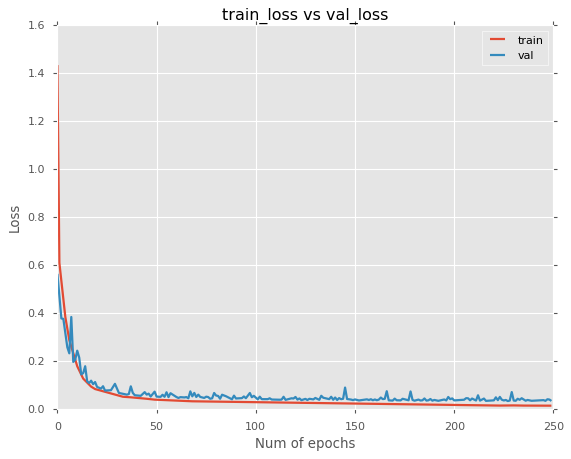

> c) Repita el paso anterior, utilizado ’**ReLU**’ como función de activación y compare con lo obtenido en b).  

```python
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
history = model.fit(X_train_scaled, y_train, epochs=250, verbose=1, validation_data=(X_val_scaled, y_val))
#%%El gráfico el error cuadrático (MSE) 
import matplotlib.pyplot as plt
train_loss=history.history['loss']
val_loss=history.history['val_loss']
xc = range(250)
plt.figure(1, figsize=(8,6))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.ylabel('Loss')
plt.xlabel('Num of epochs')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train', 'val'])
#print (plt.style.available)
plt.style.use(['ggplot'])
#%%
```

>El gráfico el error cuadrático (MSE) para el conjunto de entrenamiento y de pruebas vs número de epochs de entrenamiento, para una red feedforward de 3 capas, con 256 unidades ocultas y función de activación sigmoidal. Entrenada la red usando gradiente descendente estocástico con tasa de aprendizaje (learning rate) 0.01 y 250 epochs de entrenamiento, en el conjunto de entrenamiento y de validación.

>**Faltan comentarios!!!**
>Modificando solo esas lineas,este codigo:
```python
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="linear")) 
```
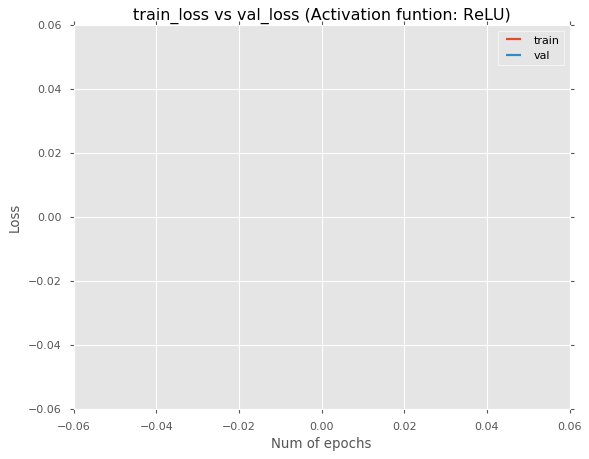


>Con este codigo:
```python
model.add(Dense(256, input_dim=X_train_scaled.shape[1], kernel_initializer='uniform',activation="relu"))
model.add(Dense(1, kernel_initializer='uniform',activation="relu")) 
```
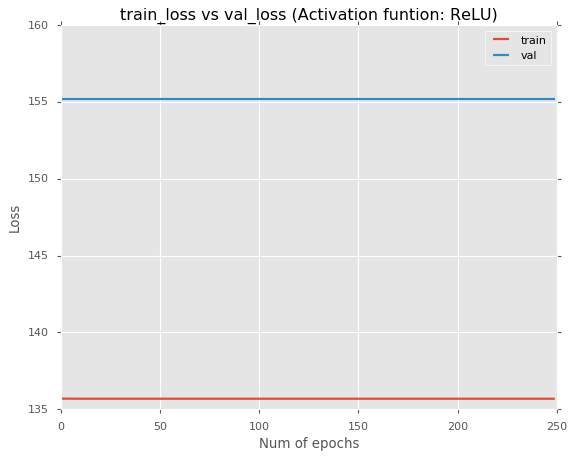